<a href="https://colab.research.google.com/github/FiahIdris/GColab_Learning/blob/main/NN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [ ]:
# sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(4, input_shape=(8,), activation='relu'))
model.add(Dense(1, activation='sigmoid')) # binary : sigmoid, multiclass: softmax

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Input

input_data = Input(shape=(8,))
x = Dense(4, activation='relu')(input_data)
output = Dense(1, activation='sigmoid')(x)
model_func = Model(inputs=input_data, outputs=output)

In [ ]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model 
# loss 
# binary class : binary_crossentropy (1)
# multi class : categorical_crossentropy
# regression : mean_squared_error / mean_absolute_error
model_func.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model fit
batch_size = 5
epochs = 150
history = model_func.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/150
106/106 [==============================] - 1s 3ms/step - loss: 6.5641 - accuracy: 0.6091 - val_loss: 3.8618 - val_accuracy: 0.5254
Epoch 2/150
106/106 [==============================] - 0s 2ms/step - loss: 3.1054 - accuracy: 0.5142 - val_loss: 3.5035 - val_accuracy: 0.5085
Epoch 3/150
106/106 [==============================] - 0s 2ms/step - loss: 2.8843 - accuracy: 0.5066 - val_loss: 3.3155 - val_accuracy: 0.5254
Epoch 4/150
106/106 [==============================] - 0s 2ms/step - loss: 2.6895 - accuracy: 0.5218 - val_loss: 3.0937 - val_accuracy: 0.4576
Epoch 5/150
106/106 [==============================] - 0s 2ms/step - loss: 2.4817 - accuracy: 0.5218 - val_loss: 2.9273 - val_accuracy: 0.5254
Epoch 6/150
106/106 [==============================] - 0s 2ms/step - loss: 2.2993 - accuracy: 0.5275 - val_loss: 2.6947 - val_accuracy: 0.5254
Epoch 7/150
106/106 [==============================] - 0s 2ms/step - loss: 2.1241 - accuracy: 0.5218 - val_loss: 2.4694 - val_accuracy: 0.5763

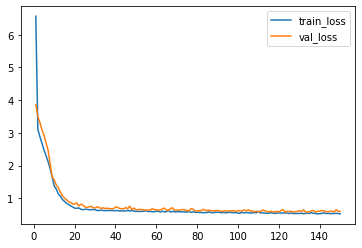

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x_axis = np.arange(1,151)

plt.plot(x_axis, history.history['loss'], label='train_loss')
plt.plot(x_axis, history.history['val_loss'], label='val_loss')
plt.legend()

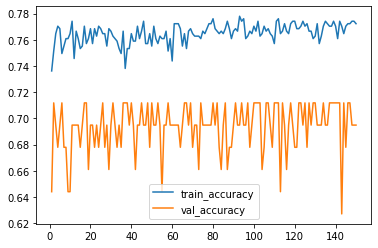

In [ ]:
plt.plot(x_axis, history.history['accuracy'], label='train_accuracy')
plt.plot(x_axis, history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
# regression model 
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.fueltype = df.fueltype.map({'gas':0, 'diesel':1})

In [ ]:
df.aspiration = df.aspiration.map({'std':0, 'turbo':1})

In [ ]:
df.doornumber = df.doornumber.map({'four':4, 'two':2})

In [ ]:
df.carbody = df.carbody.map({'convertible': 0, 'hatchback':1, 'sedan':2, 'wagon':3, 'hardtop':4})

In [ ]:
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [ ]:
df_num = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_num.drop('price', axis=1),
                                                    df_num['price'],
                                                    test_size=0.15)

In [ ]:
X_train.shape

(174, 18)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
max_y = y_train.max()
y_train = y_train / max_y
y_test = y_test / max_y

In [ ]:
# define model
model = Sequential([
    Dense(16, input_shape=(18,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=4, validation_data=(X_test, y_test), verbose=0)

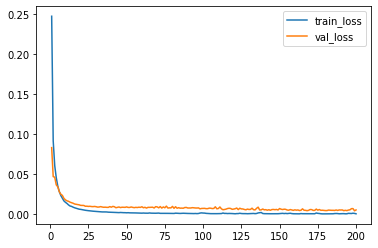

In [ ]:
x_axis = np.arange(1,201)
plt.plot(x_axis, history.history['loss'], label='train_loss')
plt.plot(x_axis, history.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
X_new = X_test[0]
X_new

array([-0.68267309, -0.32905965, -0.46559985,  0.88063057,  1.42995812,
       -0.29152318, -0.01503516, -0.22956041,  0.4831959 , -0.23820361,
       -0.4386886 ,  1.08604827, -2.13829056, -0.28873948, -0.53736752,
       -0.66976055, -0.35279768, -0.26660004])

In [ ]:
X_new = np.array([X_new])

In [ ]:
res = model.predict(X_new)
res * max_y

array([[9593.816]], dtype=float32)

### klasifikasi handwriting digits

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# download data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

Text(0.5, 1.0, '3')

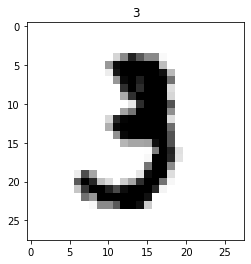

In [ ]:
plt.imshow(X_train[10], cmap='binary')
plt.title(y_train[10])

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
# build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
                    Flatten(input_shape=[28, 28]),
                    Dense(512, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')
])

In [ ]:
# siapkan label
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2510 - accuracy: 0.9235 - val_loss: 0.1163 - val_accuracy: 0.9632
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1018 - accuracy: 0.9688 - val_loss: 0.1104 - val_accuracy: 0.9667
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0691 - accuracy: 0.9784 - val_loss: 0.0962 - val_accuracy: 0.9740
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.1023 - val_accuracy: 0.9725
Epoch 5/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.1043 - val_accuracy: 0.9712
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0946 - val_accuracy: 0.9774
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.1038 - val_accu

In [ ]:
X_new = X_test[100]

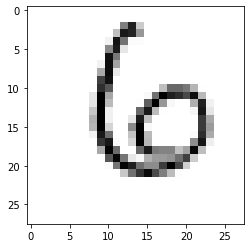

In [ ]:
plt.imshow(X_new, cmap='binary')

In [ ]:
X_new.reshape(1, 28, 28).shape

(1, 28, 28)

In [ ]:
res = model.predict(X_new.reshape(1, 28, 28))

In [ ]:
res.sum()

0.99999994

In [ ]:
res.argmax()

6

Hasil prediksi : 9


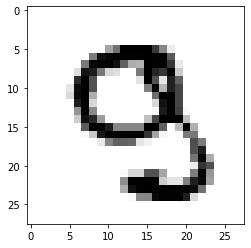

In [ ]:
idx = 151
X_new = X_test[idx]
plt.imshow(X_new, cmap='binary');
res = model.predict(X_new.reshape(1, 28, 28))
print(f"Hasil prediksi : {res.argmax()}")

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 512)               401920    
                                                                 
 dense_24 (Dense)            (None, 128)               65664     
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 478,250
Trainable params: 478,250
Non-tr

In [ ]:
X_test[0].shape

(28, 28)

In [ ]:
X_train.shape

(48000, 28, 28)

In [ ]:
X_train_vec = X_train.reshape(48000, 28*28)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)

RandomForestClassifier()

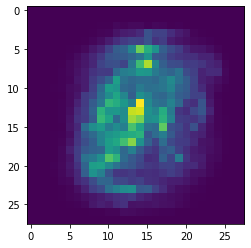

In [ ]:
fe = rf.feature_importances_.reshape(28,28)
plt.imshow(fe)

In [ ]:
# pip install tensorflow
# pip install tensorflow-cpu